## KNN Classifier for Iris DataSet

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold 
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline

In [61]:
iris=load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [116]:
# print(iris.DESCR)

In [29]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head(5)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [30]:
df_target=pd.DataFrame(iris.target,columns=["MEDV"])
df_target.head()

MEDV
0     0
1     0
2     0
3     0
4     0

In [31]:
df_full=pd.concat([df,df_target],axis=1)
df_full.head(5)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   MEDV  
0     0  
1     0  
2     0  
3     0  
4     0

In [46]:
df_full['MEDV'] = df_full['MEDV'].astype('category')

/home/xenakas/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/xenakas/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/xenakas/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


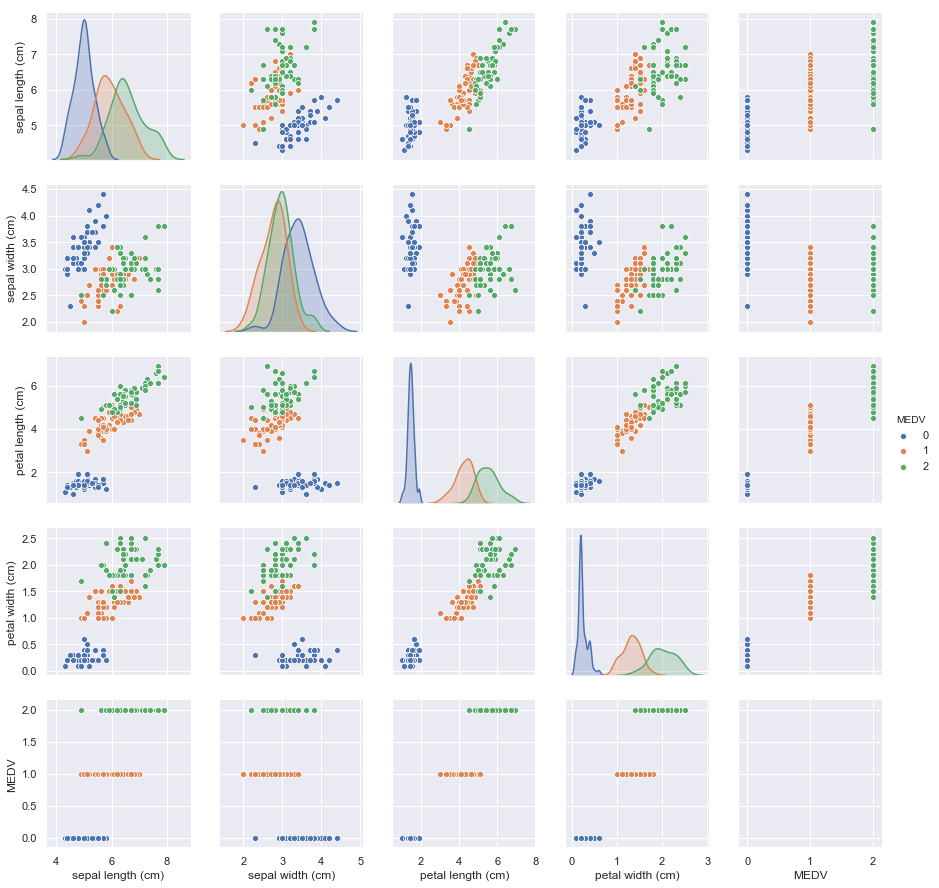

In [58]:
sns.set()
sns.pairplot(df_full, hue='MEDV', diag_kind="kde");

In [65]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=1)

### Classification metrics

In [132]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
sc_train = knn.score(X_train , y_train)
sc_test = knn.score(X_test , y_test)
sc_train, sc_test

(0.9464285714285714, 1.0)

In [133]:
pred = knn.predict(X_test)
print(sklearn.metrics.classification_report(y_test, pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        13
           1     1.0000    1.0000    1.0000        16
           2     1.0000    1.0000    1.0000         9

   micro avg     1.0000    1.0000    1.0000        38
   macro avg     1.0000    1.0000    1.0000        38
weighted avg     1.0000    1.0000    1.0000        38



In [134]:
pred_proba = knn.predict_proba(X_test)
sklearn.metrics.log_loss(y_test, pred_proba)

0.02134026884780017

### Preprocessing

#### StandardScaler

In [68]:
stdsc = StandardScaler()
stdsc.fit(X_train)
X_train_std = stdsc.transform(X_train)
X_test_std = stdsc.transform(X_test)

In [79]:
df_full_std = pd.concat([pd.DataFrame(X_train_std),pd.DataFrame(y_train)],axis=1)
df_full_std.columns = df_full.columns

/home/xenakas/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/xenakas/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/xenakas/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


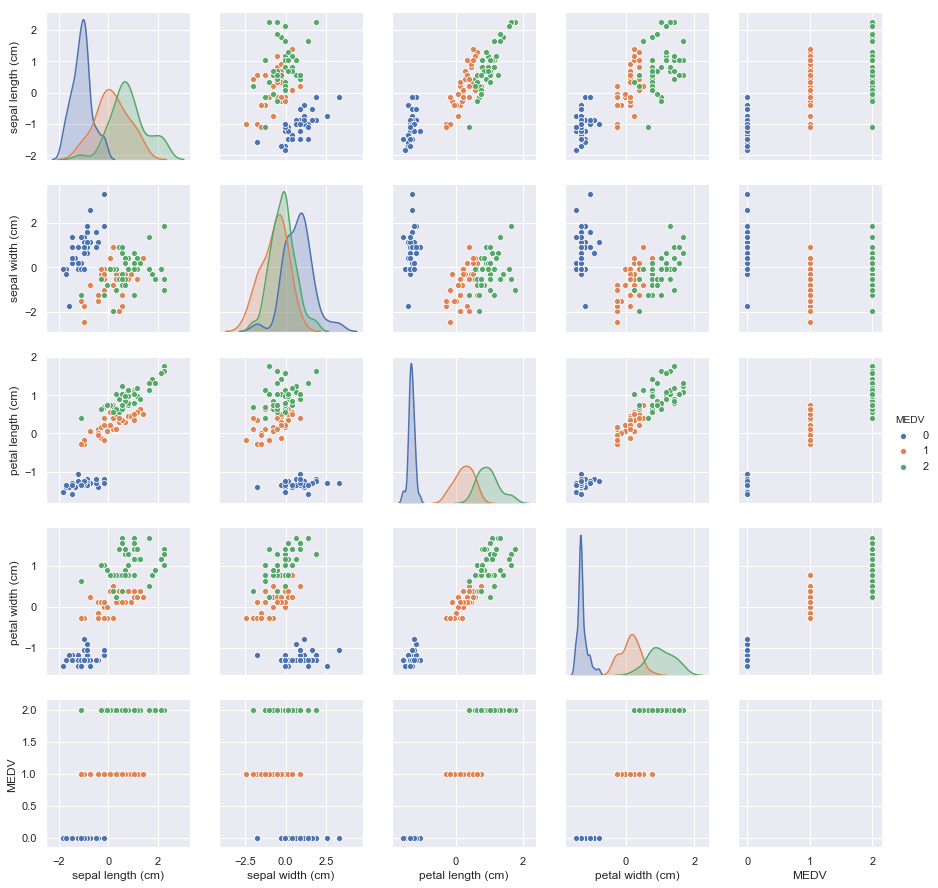

In [81]:
sns.set()
sns.pairplot(df_full_std, hue='MEDV', diag_kind="kde");

In [136]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_std, y_train)

sc_train = knn.score(X_train_std , y_train)
sc_test = knn.score(X_test_std , y_test)

sc_train, sc_test 

(0.9464285714285714, 1.0)

In [137]:
pred = knn.predict(X_test_std)
print(sklearn.metrics.classification_report(y_test, pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        13
           1     1.0000    1.0000    1.0000        16
           2     1.0000    1.0000    1.0000         9

   micro avg     1.0000    1.0000    1.0000        38
   macro avg     1.0000    1.0000    1.0000        38
weighted avg     1.0000    1.0000    1.0000        38



In [138]:
pred_proba = knn.predict_proba(X_test_std)
sklearn.metrics.log_loss(y_test, pred_proba)

0.03201040327169922

#### MinMaxScaler

In [82]:
mmsc = MinMaxScaler()
mmsc.fit(X_train)
X_train_mm = mmsc.transform(X_train)
X_test_mm = mmsc.transform(X_test)

In [83]:
df_full_mm = pd.concat([pd.DataFrame(X_train_mm),pd.DataFrame(y_train)],axis=1)
df_full_mm.columns = df_full.columns

/home/xenakas/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/xenakas/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/xenakas/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


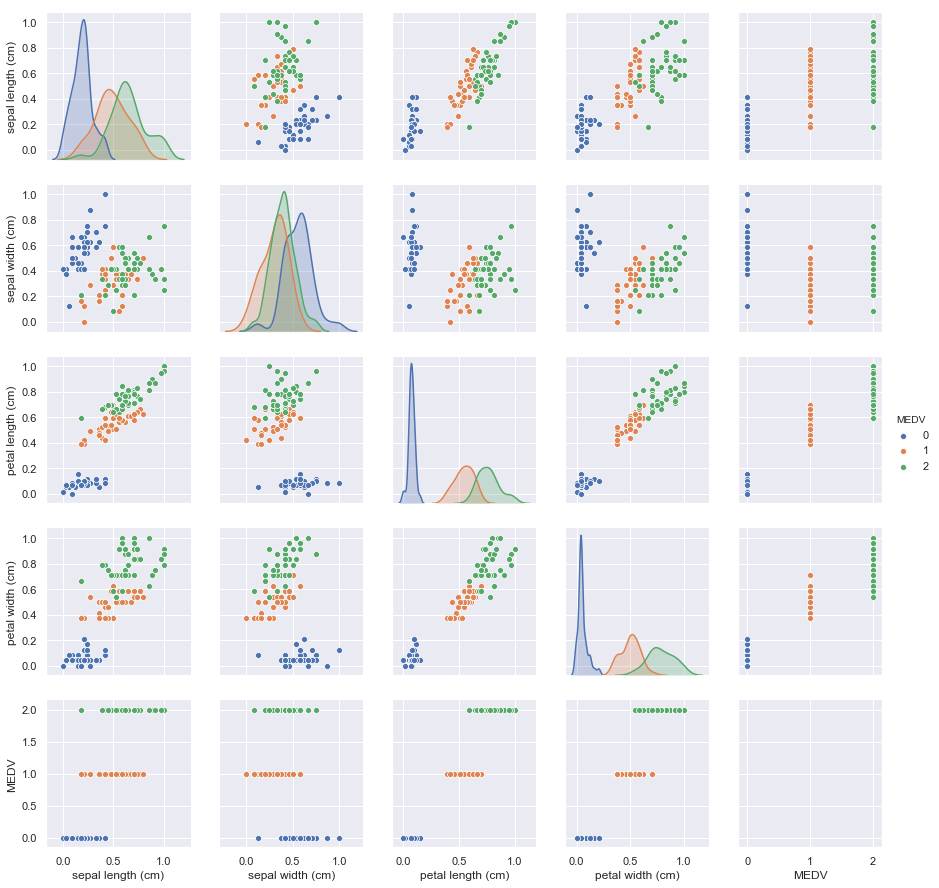

In [84]:
sns.set()
sns.pairplot(df_full_mm, hue='MEDV', diag_kind="kde");

In [145]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_mm, y_train)

sc_train = knn.score(X_train_mm , y_train)
sc_test = knn.score(X_test_mm, y_test)

sc_train, sc_test

(0.9553571428571429, 1.0)

In [146]:
pred = knn.predict(X_test_mm)
print(sklearn.metrics.classification_report(y_test, pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        13
           1     1.0000    1.0000    1.0000        16
           2     1.0000    1.0000    1.0000         9

   micro avg     1.0000    1.0000    1.0000        38
   macro avg     1.0000    1.0000    1.0000        38
weighted avg     1.0000    1.0000    1.0000        38



In [147]:
pred_proba = knn.predict_proba(X_test_mm)
sklearn.metrics.log_loss(y_test, pred_proba)

0.01067013442390114

#### RobustScaler

In [85]:
robsc = RobustScaler()
robsc.fit(X_train)
X_train_rob = robsc.transform(X_train)
X_test_rob = robsc.transform(X_test)

In [86]:
df_full_rob = pd.concat([pd.DataFrame(X_train_rob),pd.DataFrame(y_train)],axis=1)
df_full_rob.columns = df_full.columns

/home/xenakas/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/xenakas/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/xenakas/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


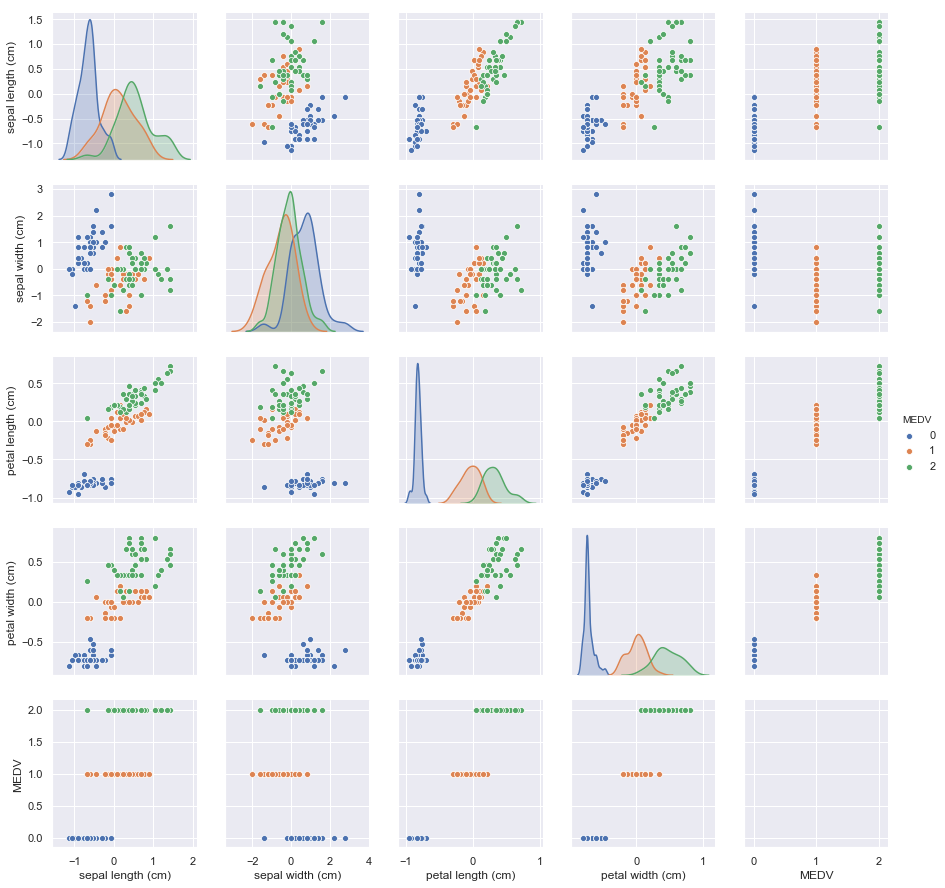

In [87]:
sns.set()
sns.pairplot(df_full_rob, hue='MEDV', diag_kind="kde");

In [149]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_rob, y_train)

sc_train = knn.score(X_train_rob , y_train)
sc_test = knn.score(X_test_rob , y_test)

sc_train, sc_test

(0.9375, 0.9736842105263158)

In [150]:
pred = knn.predict(X_test_rob)
print(sklearn.metrics.classification_report(y_test, pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        13
           1     1.0000    0.9375    0.9677        16
           2     0.9000    1.0000    0.9474         9

   micro avg     0.9737    0.9737    0.9737        38
   macro avg     0.9667    0.9792    0.9717        38
weighted avg     0.9763    0.9737    0.9740        38



In [151]:
pred_proba = knn.predict_proba(X_test_rob)
sklearn.metrics.log_loss(y_test, pred_proba)

0.060921252973491546

#### Normalizer

In [89]:
norm = Normalizer()
norm.fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [90]:
df_full_norm = pd.concat([pd.DataFrame(X_train_norm),pd.DataFrame(y_train)],axis=1)
df_full_norm.columns = df_full.columns

/home/xenakas/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/xenakas/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/xenakas/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


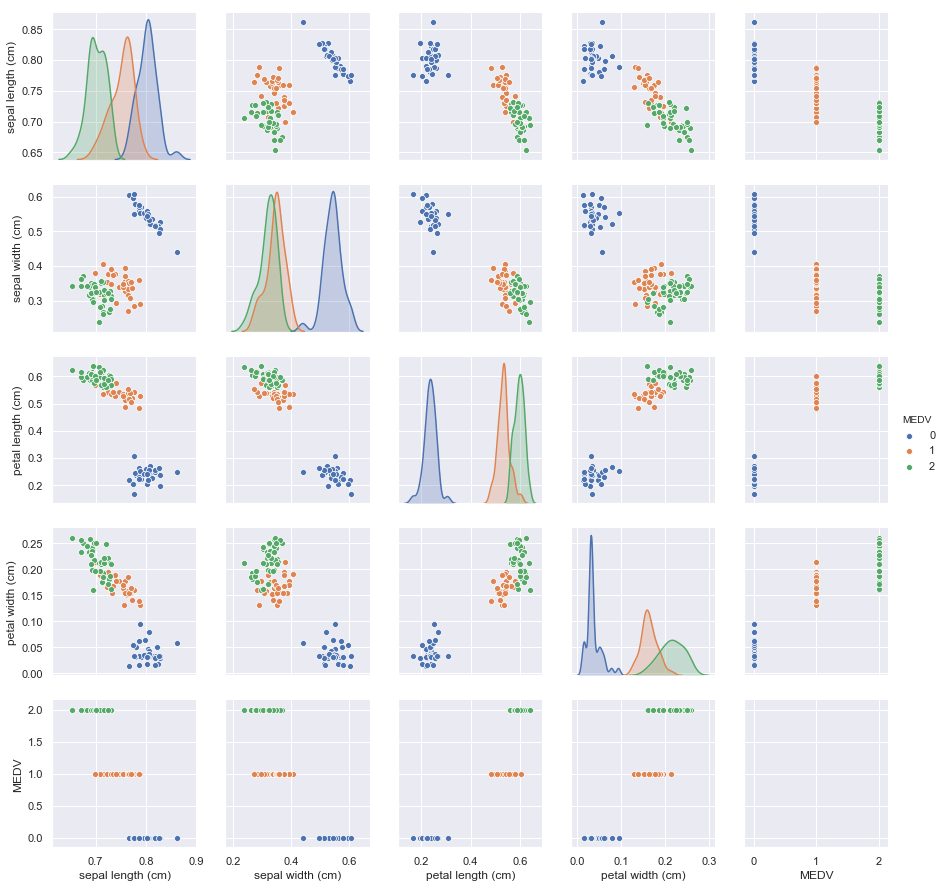

In [91]:
sns.set()
sns.pairplot(df_full_norm, hue='MEDV', diag_kind="kde");

In [152]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_norm, y_train)

sc_train = knn.score(X_train_norm , y_train)
sc_test = knn.score(X_test_norm, y_test)

sc_train, sc_test

(0.9732142857142857, 0.9473684210526315)

In [153]:
pred = knn.predict(X_test_norm)
print(sklearn.metrics.classification_report(y_test, pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        13
           1     0.9375    0.9375    0.9375        16
           2     0.8889    0.8889    0.8889         9

   micro avg     0.9474    0.9474    0.9474        38
   macro avg     0.9421    0.9421    0.9421        38
weighted avg     0.9474    0.9474    0.9474        38



In [155]:
pred_proba = knn.predict_proba(X_test_norm)
sklearn.metrics.log_loss(y_test, pred_proba)

0.1218425059469809

#### Вывод
Наилучшие результаты получаются при использовании __MinMaxScaler__

### Finding the best combination of hyperparameters 

In [182]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=1)

In [183]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('classifier', KNeighborsClassifier())])

param_grid = { 
               'preprocessing': [MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer(), None], 
               'classifier': [KNeighborsClassifier()],
               'classifier__n_neighbors': [int(x) for x in np.linspace(start = 1, stop = 10, num = 10)],
               'classifier__p': [1, 2, 3, 4, 6, 8, 10],
               'classifier__weights': ['uniform', 'distance'],
               'classifier__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
             }

kfold = KFold(n_splits=10, shuffle=True, random_state=42)


In [184]:
grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True, iid=True)
grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('preprocessing', MinMaxScaler(copy=True, feature_range=(0, 1))), ('classifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid=True, n_jobs=None,
       param_grid={'preprocessing': [MinMaxScaler(copy=True, feature_range=(0, 1)), StandardScaler(copy=True, with_mean=True, with_std=True), RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True), Normalizer(copy=True, norm='l2'), None], 'classifier': [KNeighbo...ights': ['uniform', 'distance'], 'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [185]:
print("----------------- Обучили и тестировали -------------------")
print("Наилучшие параметры:\n{}\n".format(grid.best_params_))
print("Средняя правильность для наилучшей модели кроссвалидации на валидационных тестовых наборах: {:.6f}\n".format(grid.best_score_)) 
print("Правильность для наилучшей модели на тестовом наборе: {:.6f}\n".format(grid.score(X_test, y_test)))
gridresults = pd.DataFrame(grid.cv_results_)
display(gridresults.sort_values(["rank_test_score"]).T)

----------------- Обучили и тестировали -------------------
Наилучшие параметры:
{'classifier': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform'), 'classifier__algorithm': 'auto', 'classifier__n_neighbors': 7, 'classifier__p': 2, 'classifier__weights': 'uniform', 'preprocessing': MinMaxScaler(copy=True, feature_range=(0, 1))}

Средняя правильность для наилучшей модели кроссвалидации на валидационных тестовых наборах: 0.973214

Правильность для наилучшей модели на тестовом наборе: 1.000000



628   \
mean_fit_time                                                        0.000849485   
std_fit_time                                                         0.000242013   
mean_score_time                                                       0.00126202   
std_score_time                                                       7.60076e-05   
param_classifier               KNeighborsClassifier(algorithm='auto', leaf_si...   
param_classifier__algorithm                                                 auto   
param_classifier__n_neighbors                                                  9   
param_classifier__p                                                           10   
param_classifier__weights                                               distance   
param_preprocessing                             Normalizer(copy=True, norm='l2')   
params                         {'classifier': KNeighborsClassifier(algorithm=...   
split0_test_score                                                       0.916667   
split1_test_score                                                              1   
split2_test_score                                                              1   
split3_test_score                                                              1   
split4_test_score                                                              1   
split5_test_score                                                              1   
split6_test_score                                                       0.818182   
split7_test_score                                                              1   
split8_test_score                                                              1   
split9_test_score                                                              1   
mean_test_score                                                         0.973214   
std_test_score                                                          0.057213   
rank_test_score                                                                1   
split0_train_score                                                             1   
split1_train_score                                                             1   
split2_train_score                                                             1   
split3_train_score                                                             1   
split4_train_score                                                             1   
split5_train_score                                                             1   
split6_train_score                                                             1   
split7_train_score                                                             1   
split8_train_score                                                             1   
split9_train_score                                                             1   
mean_train_score                                                               1   
std_train_score                                                                0   

                                                                            1279  \
mean_fit_time                                                         0.00121377   
std_fit_time                                                         0.000352675   
mean_score_time                                                       0.00199976   
std_score_time                                                       0.000453001   
param_classifier               KNeighborsClassifier(algorithm='auto', leaf_si...   
param_classifier__algorithm                                            ball_tree   
param_classifier__n_neighbors                                                  9   
param_classifier__p                                                            2   
param_classifier__weights                                               distance   
param_preprocessing                                                         None   
params                         {'classifier